## Project 2 Requirements

1. Include a problem statement
2. State the risks and assumptions of your data
3. Import data using the Pandas library
4. Perform exploratory data analysis
5. Use Tableau and/or Python plotting modules to visualize data
6. Observe correlations in the data
7. Evaluate a hypothesis
8. Present results in a polished companion blog post of at least 500 words (& 1-2 graphics!)

## Project 2 Deliverables
1. Jupyter Notebook analysis
2. Blog Post

# Notebook Contents:

1. Load data onto dataframe and read
2. Examine data
3. Clean data
4. Create new columns
5. Data exploration
6. Data visualization and evaluation
7. Linear models
8. Statistical Analysis

### Hypothesis: Songs that rose to their peak position quickly stay in the chart longer.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

### Part 1: Load data onto dataframe and read 

In [73]:
df = pd.read_csv('/users/kristensu/dropbox/GA-DSI/DSI-copy/projects/projects-weekly/project-02/assets/billboard.csv')

### Part 2: Examine data

In [74]:
print df.columns
print df.index

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [75]:
df.dtypes

year                int64
artist.inverted    object
track              object
time               object
genre              object
date.entered       object
date.peaked        object
x1st.week           int64
x2nd.week          object
x3rd.week          object
x4th.week          object
x5th.week          object
x6th.week          object
x7th.week          object
x8th.week          object
x9th.week          object
x10th.week         object
x11th.week         object
x12th.week         object
x13th.week         object
x14th.week         object
x15th.week         object
x16th.week         object
x17th.week         object
x18th.week         object
x19th.week         object
x20th.week         object
x21st.week         object
x22nd.week         object
x23rd.week         object
                    ...  
x47th.week         object
x48th.week         object
x49th.week         object
x50th.week         object
x51st.week         object
x52nd.week         object
x53rd.week         object
x54th.week  

In [76]:
df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*


## Part 3: Clean data

In [77]:
#1: Replace all * with np.nan
def no_asterisk(x):
    if x == '*':
        return np.nan
    else:
        return x

df.applymap(no_asterisk)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,"4,17,00 AM",Rock,"June 17, 2000","August 26, 2000",59,52,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,"4,31,00 AM",Rock'n'roll,"December 25, 1999","March 18, 2000",83,83,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,"3,36,00 AM",Latin,"April 1, 2000","June 24, 2000",63,45,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,"3,52,00 AM",Rock'n'roll,"June 24, 2000","August 12, 2000",77,66,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,"4,25,00 AM",Country,"June 5, 1999","March 4, 2000",81,54,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#2: Reformat 'time' and convert from dtype object to timedelta in seconds
df['time'] = df['time'].str.replace(',',':')
df['time'] = df['time'].str.strip('AM')
df['time'] = pd.to_timedelta(df['time'], unit = 's')

df['time'].head(3)

0   03:38:00
1   04:18:00
2   04:07:00
Name: time, dtype: timedelta64[ns]

In [79]:
#3: Convert dates ('date.entered', 'date.peaked') from dtype object to datetime
df['date.entered'] = pd.to_datetime(df['date.entered'], infer_datetime_format=True)
df['date.peaked'] = pd.to_datetime(df['date.peaked'], infer_datetime_format=True)

print df['date.entered'].head(3)
print df['date.peaked'].head(3)

0   2000-09-23
1   2000-02-12
2   1999-10-23
Name: date.entered, dtype: datetime64[ns]
0   2000-11-18
1   2000-04-08
2   2000-01-29
Name: date.peaked, dtype: datetime64[ns]


In [80]:
#4: Rename 'artist.inverted' column to 'artist' 
df.rename(columns={'artist.inverted':'artist'}, inplace=True)
df['artist'].head(1)

0    Destiny's Child
Name: artist, dtype: object

In [81]:
#5: Rename all column names with '.' to '_'
df.columns = [x.replace('.', '_') for x in df.columns]
df.columns[5:10]

Index([u'date_entered', u'date_peaked', u'x1st_week', u'x2nd_week',
       u'x3rd_week'],
      dtype='object')

In [82]:
#6: Convert week columns from dtype object to dtype numeric
for i in range(7,len(df.columns)):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]],errors='coerce')

df.head(3)

,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x67th_week,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
0,2000,Destiny's Child,Independent Women Part I,03:38:00,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",04:18:00,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,04:07:00,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#7a: Determine what genre names are
df['genre'].value_counts()

Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             13
R & B           10
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [84]:
#7b: Consolidate genre names
df['genre'].replace("Rock'n'roll", 'Rock', inplace=True)
df['genre'].replace('R & B', 'R&B', inplace=True)
df['genre'].head(3)

0    Rock
1    Rock
2    Rock
Name: genre, dtype: object

In [85]:
#8a: Check each column to see if any of the week columns contain all null values
print df.isnull().sum()
print len(df.columns)

year              0
artist            0
track             0
time              0
genre             0
date_entered      0
date_peaked       0
x1st_week         0
x2nd_week         5
x3rd_week        10
x4th_week        17
x5th_week        25
x6th_week        37
x7th_week        48
x8th_week        57
x9th_week        64
x10th_week       73
x11th_week       81
x12th_week       95
x13th_week      107
x14th_week      113
x15th_week      120
x16th_week      135
x17th_week      140
x18th_week      151
x19th_week      161
x20th_week      171
x21st_week      252
x22nd_week      262
x23rd_week      269
               ... 
x47th_week      312
x48th_week      313
x49th_week      313
x50th_week      313
x51st_week      313
x52nd_week      313
x53rd_week      313
x54th_week      315
x55th_week      315
x56th_week      315
x57th_week      315
x58th_week      315
x59th_week      315
x60th_week      315
x61st_week      315
x62nd_week      315
x63rd_week      315
x64th_week      315
x65th_week      316


In [86]:
#8b: Remove week columns consisting of all nulls to simplify dataframe
df.dropna(axis=1, how='all', inplace=True)
df.head(3)

,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x56th_week,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week
0,2000,Destiny's Child,Independent Women Part I,03:38:00,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",04:18:00,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,04:07:00,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 4: Create columns

In [87]:
#Create column with total weeks on chart for each song
df['weeks_on_chart'] = df.iloc[:, 7:].count(axis = 1)

In [88]:
#Create column with top chart rank for each song
df['top_chart_rank'] = df.iloc[:, 7:].min(axis=1)

In [89]:
#Create column for average amount of weeks each song stayed on chart
df['avg_rank'] = (df.iloc[:, 7:83].sum(axis=1))/df['weeks_on_chart']

In [90]:
#Create a column that gives the time to took for a track from entering the charts to peaking
df['weeks_to_peak_rank'] = (df['date_peaked'] - df['date_entered']).apply(lambda x: x).astype(np.timedelta64(1,'W'))

In [91]:
#Create columns to separate out month from 'date_entered'
df['month_entered'] = df['date_entered'].dt.month

In [93]:
df.head(3)

,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week,weeks_on_chart,top_chart_rank,avg_rank,weeks_to_peak_rank,month_entered
0,2000,Destiny's Child,Independent Women Part I,03:38:00,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,28,1.0,15.857143,8.0,9
1,2000,Santana,"Maria, Maria",04:18:00,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,26,1.0,11.538462,8.0,2
2,2000,Savage Garden,I Knew I Loved You,04:07:00,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,33,1.0,18.393939,14.0,10


## Part 5: Data Exploration

In [94]:
#Describe data
df.describe()

,year,time,x1st_week,x2nd_week,x3rd_week,x4th_week,x5th_week,x6th_week,x7th_week,x8th_week,...,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week,weeks_on_chart,top_chart_rank,avg_rank,weeks_to_peak_rank,month_entered
count,317.0,317,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,...,2.000000,2.000000,2.000000,2.0,1.0,317.000000,317.000000,317.000000,317.000000,317.000000
mean,2000.0,0 days 04:02:25.552050,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,...,42.500000,44.500000,47.500000,50.0,49.0,16.741325,11.958991,62.853465,7.463722,6.485804
std,0.0,0 days 00:42:24.097057,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,...,0.707107,3.535534,3.535534,0.0,NaN,9.083785,6.802937,24.297622,5.838229,3.519919
min,2000.0,0 days 02:36:00,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,...,42.000000,42.000000,45.000000,50.0,49.0,1.000000,1.000000,11.538462,0.000000,1.000000
25%,2000.0,0 days 03:39:00,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,...,42.250000,43.250000,46.250000,50.0,49.0,10.000000,6.000000,45.000000,3.000000,3.000000
50%,2000.0,0 days 03:56:00,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,...,42.500000,44.500000,47.500000,50.0,49.0,18.000000,12.000000,66.173913,7.000000,7.000000
75%,2000.0,0 days 04:17:00,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,...,42.750000,45.750000,48.750000,50.0,49.0,20.000000,19.000000,82.600000,10.000000,10.000000
max,2000.0,0 days 07:50:00,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,...,43.000000,47.000000,50.000000,50.0,49.0,57.000000,29.000000,101.000000,45.000000,12.000000


In [95]:
df.head(3)

,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week,weeks_on_chart,top_chart_rank,avg_rank,weeks_to_peak_rank,month_entered
0,2000,Destiny's Child,Independent Women Part I,03:38:00,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,28,1.0,15.857143,8.0,9
1,2000,Santana,"Maria, Maria",04:18:00,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,26,1.0,11.538462,8.0,2
2,2000,Savage Garden,I Knew I Loved You,04:07:00,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,33,1.0,18.393939,14.0,10


In [248]:
#Create a new dataframe with only the columns needed for further analysis
bb_df = df[['artist', 'track', 'genre', 'top_chart_rank', 'date_entered', 'date_peaked',  \
            'weeks_on_chart', 'weeks_to_peak_rank', 'avg_rank', 'month_entered']]
bb_df.head()

,artist,track,genre,top_chart_rank,date_entered,date_peaked,weeks_on_chart,weeks_to_peak_rank,avg_rank,month_entered
0,Destiny's Child,Independent Women Part I,Rock,1.0,2000-09-23,2000-11-18,28,8.0,15.857143,9
1,Santana,"Maria, Maria",Rock,1.0,2000-02-12,2000-04-08,26,8.0,11.538462,2
2,Savage Garden,I Knew I Loved You,Rock,1.0,1999-10-23,2000-01-29,33,14.0,18.393939,10
3,Madonna,Music,Rock,1.0,2000-08-12,2000-09-16,24,5.0,14.500000,8
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,1.0,2000-08-05,2000-10-14,21,10.0,21.000000,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1329321d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13138d950>]], dtype=object)

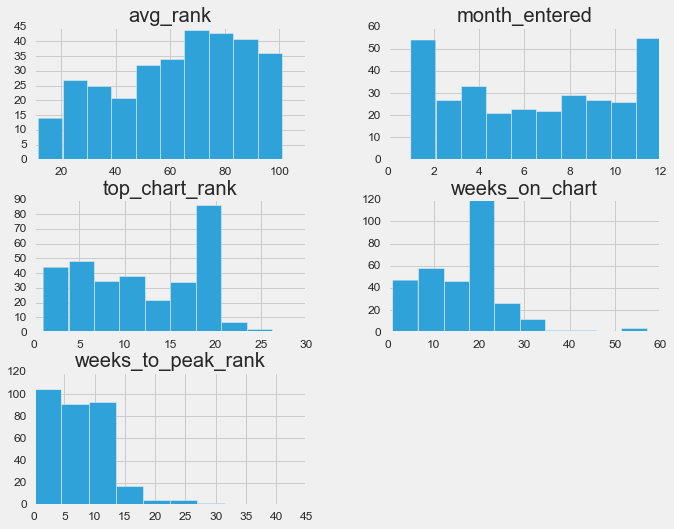

In [249]:
#Plot histograms of variable distributions
bb_df.hist(figsize=(10,8), xlabelsize=12, ylabelsize=12)

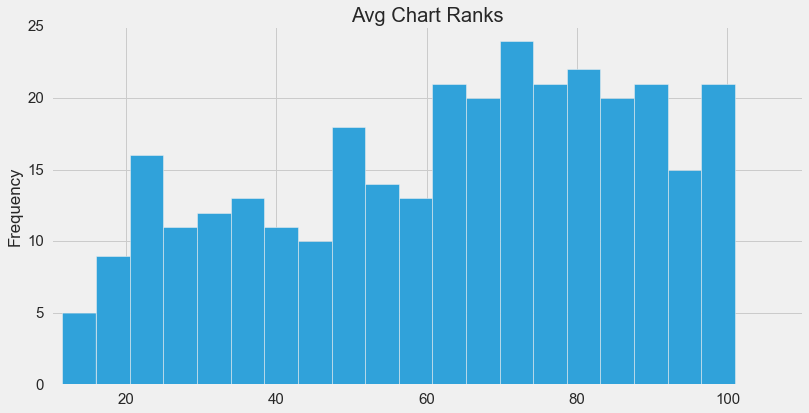

In [250]:
#avg_rank
bb_df['avg_rank'].plot(kind = 'hist', figsize = (12,6), \
                       title = 'Avg Chart Ranks', bins = 20, fontsize = 15)

##Comments: The majority of the tracks did not average in the top 20, mostly hovering from #60 - #80 in the chart.

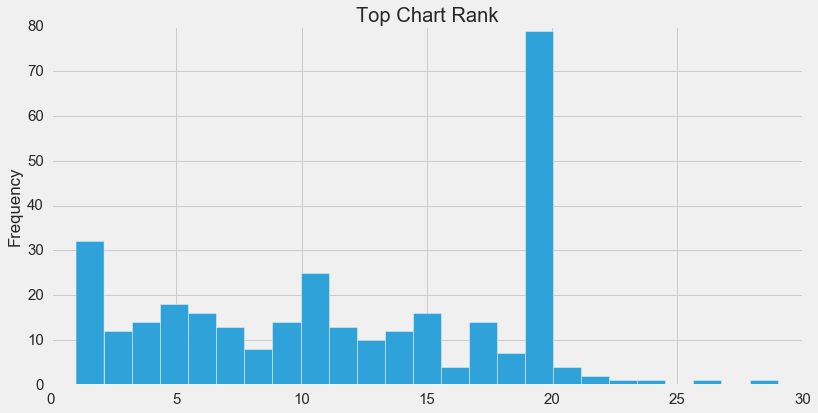

In [251]:
#top_chart_rank
bb_df['top_chart_rank'].plot(kind = 'hist', figsize = (12,6), \
                       title = 'Top Chart Rank', bins = 25, fontsize = 15)

##Comments: It appears that most songs peaked at about #20 on the chart or higher with some outliers
## of exceptional longevity.

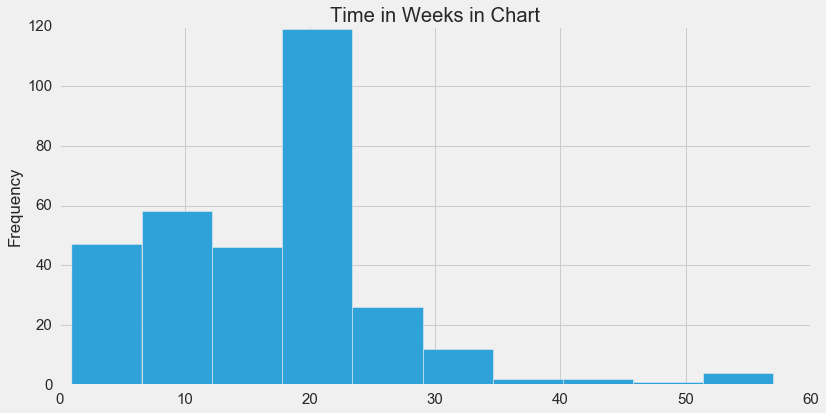

In [253]:
#weeks_on_chart
bb_df['weeks_on_chart'].plot(kind = 'hist', figsize = (12,6), \
                       title = 'Time in Weeks in Chart', fontsize = 15)

##Comments: Most songs spend 20 weeks or less on the chart.

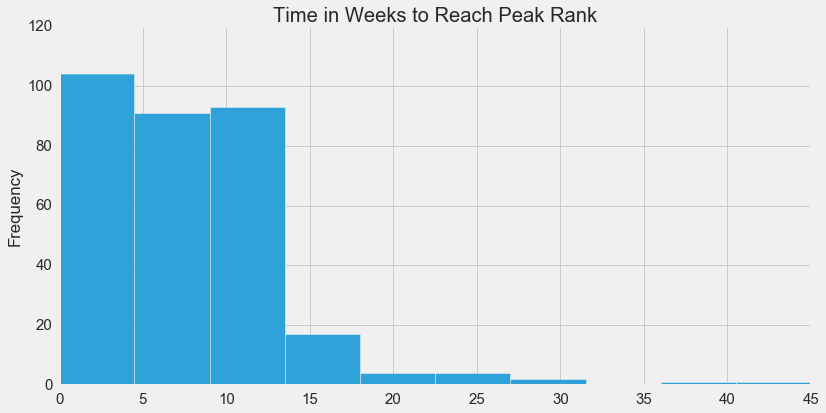

In [252]:
#weeks_to_peak_rank
bb_df['weeks_to_peak_rank'].plot(kind = 'hist', figsize = (12,6), \
                       title = 'Time in Weeks to Reach Peak Rank', fontsize = 15)

##Comments: The great majority of tracks reached their peak in under 3 months.

### Seaborn pairplot to plot each variable against another
Relationships to note:
* avg_rank and weeks_to_peak_rank
* weeks_to_peak_rank and top_chart_rank

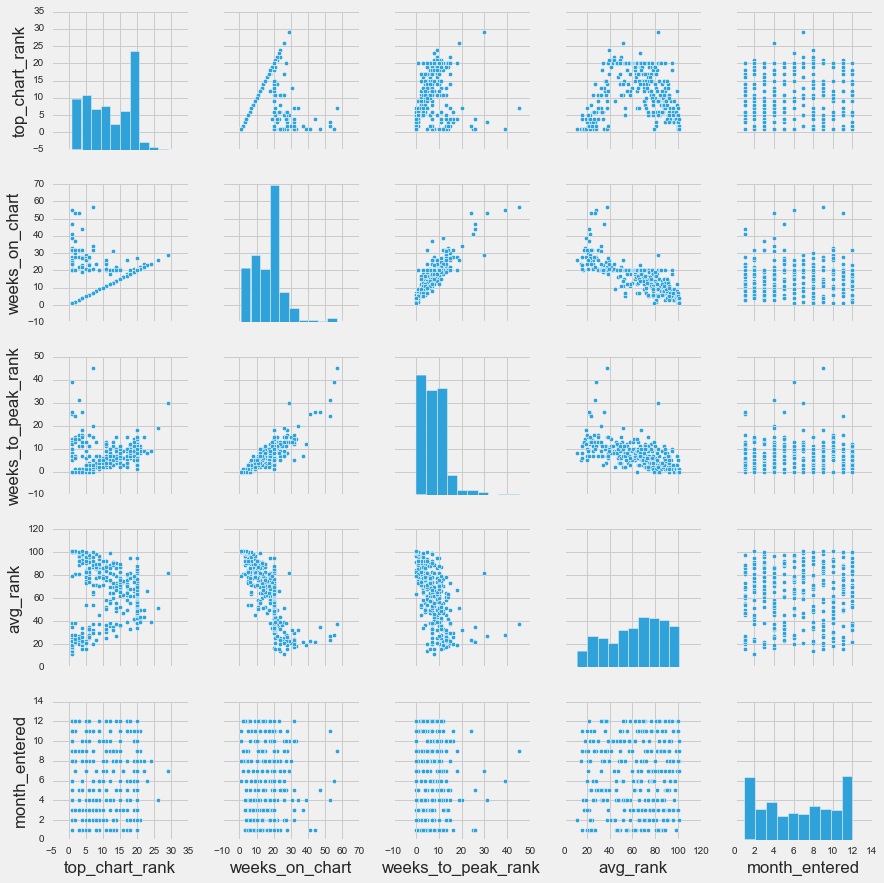

In [254]:
sns.pairplot(bb_df, size=2.5)

In [ ]:
#plot mean positions weekly

## Part 6: Data visualization and evaluation

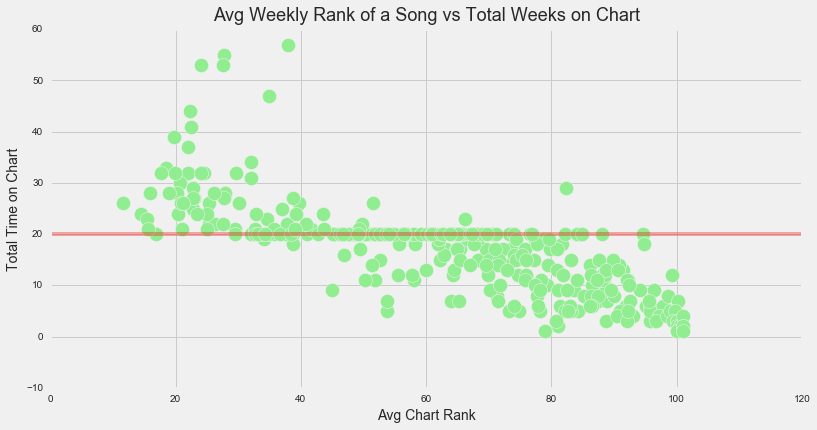

In [259]:
fig, ax = plt.subplots(1,1, figsize = (12,6))

ax.scatter(x = bb_df['avg_rank'], y = bb_df['weeks_on_chart'],\
                s = 200, c = 'lightgreen')

ax.set_title('Avg Weekly Rank of a Song vs Total Weeks on Chart', fontsize = 18, y = 1.01)
ax.set_xlabel('Avg Chart Rank', fontsize = 14);
ax.set_ylabel('Total Time on Chart', fontsize = 14)

ax.axhline(y = 20, color = 'r', alpha = .33, animated = True)


plt.savefig('avg_rank_vs_total_time.png')

### Avg Rank vs. Total Time on Chart
1. It makes sense that songs with a higher average chart rank stayed in the chart longer.
2. However there is an interesting line of songs with varying average ranks that stayed in the chart right around 20 weeks.

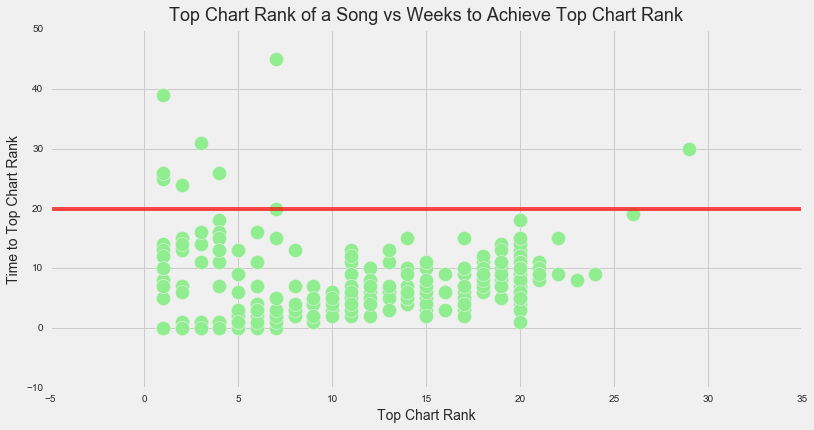

In [227]:
fig, ax = plt.subplots(1,1, figsize = (12,6))

ax.scatter(x = bb_df['top_chart_rank'], y = bb_df['weeks_to_peak_rank'],\
                s = 200, c = 'lightgreen')

ax.set_title('Top Chart Rank of a Song vs Weeks to Achieve Top Chart Rank', fontsize = 18, y = 1.01)
ax.set_xlabel('Top Chart Rank', fontsize = 14);
ax.set_ylabel('Time to Top Chart Rank', fontsize = 14)

ax.axhline(y = 20, color = 'r', alpha = .7, animated = True)

plt.savefig('top_rank_vs_time.png')

### Top Chart Rank of a Song vs Weeks to Achieve Top Rank Observations
1. Most songs reached their peak rank in the Billboard Top 100 chart within 20 weeks
2. There are some outliers who reached very high positions in the chart and took longer than 20 weeks, perhaps songs from relatively unknown artists that slowly gained momentum 
3. There is a fairly even distribution of the time to reach peak chart rank amongst songs of all top chart rank positions.
       


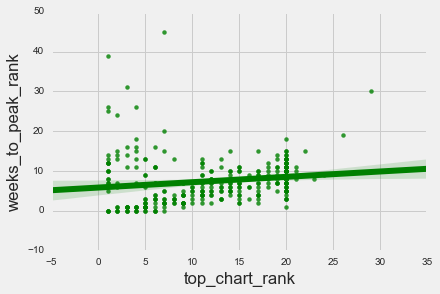

In [207]:
x = bb_df['top_chart_rank']
y = bb_df['weeks_to_peak_rank']

sns.regplot(x,y, color = 'g')

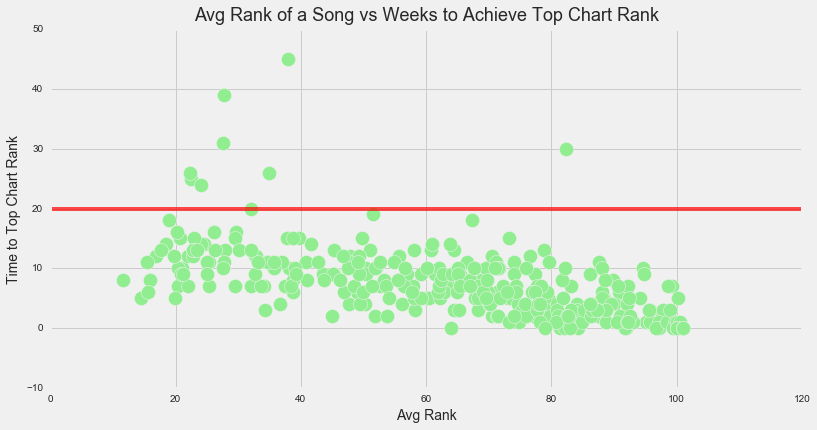

In [201]:
fig, ax = plt.subplots(1,1, figsize = (12,6))

ax.scatter(x = bb_df['avg_rank'], y = bb_df['weeks_to_peak_rank'],\
                s = 200, c = 'lightgreen')

ax.set_title('Avg Rank of a Song vs Weeks to Achieve Top Chart Rank', fontsize = 18, y = 1.01)
ax.set_xlabel('Avg Rank', fontsize = 14);
ax.set_ylabel('Time to Top Chart Rank', fontsize = 14)

ax.axhline(y = 20, color = 'r', alpha = .7, animated = True)

plt.savefig('avg_rank_vs_time.png')

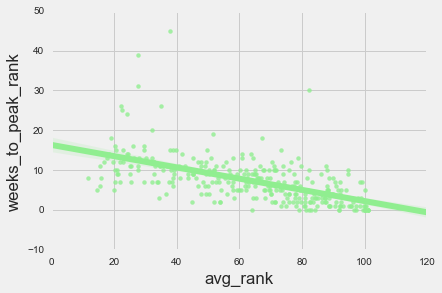

In [217]:
x = bb_df['avg_rank']
y = bb_df['weeks_to_peak_rank']

sns.regplot(x,y, color = 'lightgreen')

### Part 7: Linear Models 

In [218]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [219]:
bb_df.columns

Index([u'artist', u'track', u'genre', u'top_chart_rank', u'date_entered',
       u'date_peaked', u'weeks_to_peak_rank', u'avg_rank', u'month_entered'],
      dtype='object')

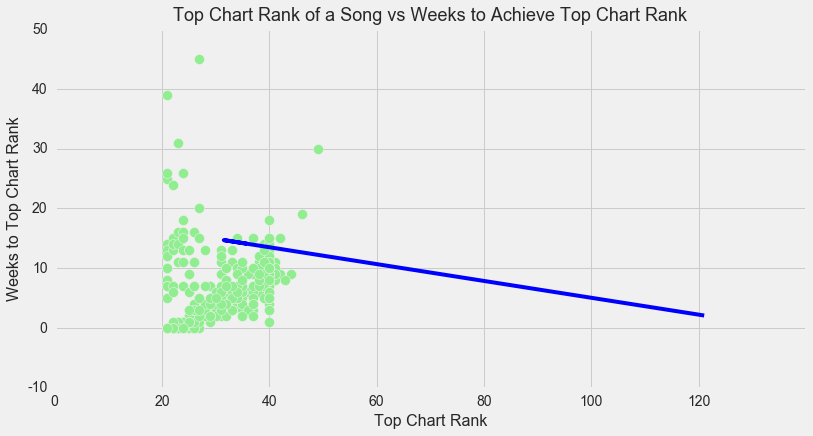

In [245]:
lm = linear_model.LinearRegression()

X = bb_df[['avg_rank']]
y = bb_df[['weeks_to_peak_rank']]

lm.fit(X, y)
predictions = lm.predict(X)

fig, ax = plt.subplots(1,1, figsize = (12,6))

plt.scatter(x = bb_df['top_chart_rank'], y = bb_df['weeks_to_peak_rank'],s = 100, c = 'lightgreen')
plt.plot(X, predictions, c= 'b')

ax.set_title('Top Chart Rank of a Song vs Weeks to Achieve Top Chart Rank', fontsize = 18, y = 1.01)
ax.set_xlabel('Top Chart Rank', fontsize = 16)
ax.set_xticklabels([0,20,40,60,80,100,120],fontsize = 14)
ax.set_ylabel('Weeks to Top Chart Rank', fontsize = 16)
ax.set_yticklabels([-10,0,10,20,30,40,50], fontsize = 14)

plt.savefig('top_rank_vs_time_reg.png')

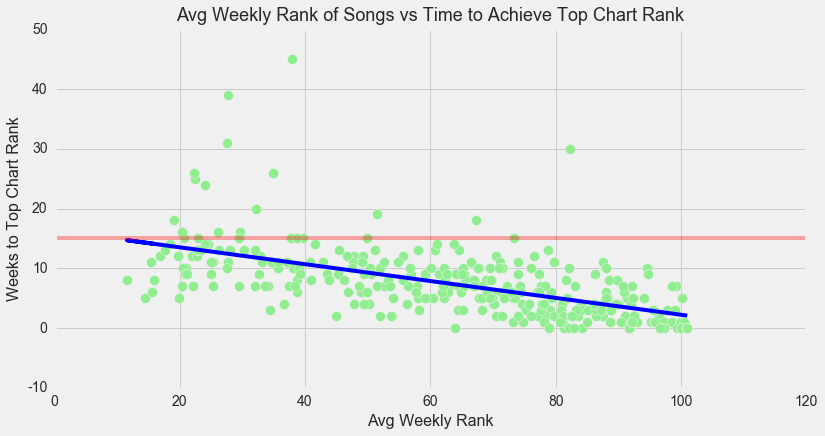

In [278]:
lm = linear_model.LinearRegression()

X = bb_df[['avg_rank']]
y = bb_df[['weeks_to_peak_rank']]

lm.fit(X, y)
predictions = lm.predict(X)

fig, ax = plt.subplots(1,1, figsize = (12,6))

plt.scatter(x = bb_df['avg_rank'], y = bb_df['weeks_to_peak_rank'],s = 100, c = 'lightgreen')
plt.plot(X, predictions, c= 'b')

ax.set_title('Avg Weekly Rank of Songs vs Time to Achieve Top Chart Rank', fontsize = 18, y = 1.01)
ax.set_xlabel('Avg Weekly Rank', fontsize = 16)
ax.set_xticklabels([0,20,40,60,80,100,120],fontsize = 14)
ax.set_ylabel('Weeks to Top Chart Rank', fontsize = 16)
ax.set_yticklabels([-10,0,10,20,30,40,50], fontsize = 14)

ax.axhline(y = 15, color = 'r', alpha = .33, animated = True)

plt.savefig('avg_rank_vs_time_to_top.png')

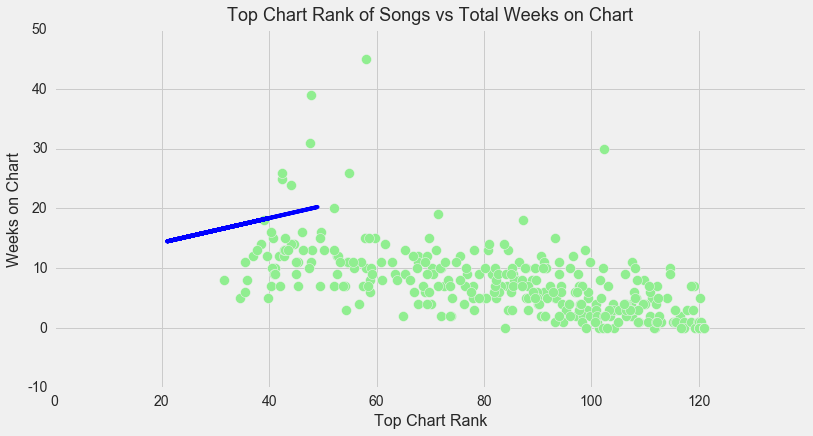

In [264]:
lm = linear_model.LinearRegression()

X = bb_df[['top_chart_rank']]
y = bb_df[['weeks_on_chart']]

lm.fit(X, y)
predictions = lm.predict(X)

fig, ax = plt.subplots(1,1, figsize = (12,6))

plt.scatter(x = bb_df['avg_rank'], y = bb_df['weeks_to_peak_rank'],s = 100, c = 'lightgreen')
plt.plot(X, predictions, c= 'b')

ax.set_title('Top Chart Rank of Songs vs Total Weeks on Chart', fontsize = 18, y = 1.01)
ax.set_xlabel('Top Chart Rank', fontsize = 16)
ax.set_xticklabels([0,20,40,60,80,100,120],fontsize = 14)
ax.set_ylabel('Weeks on Chart', fontsize = 16)
ax.set_yticklabels([-10,0,10,20,30,40,50], fontsize = 14)

plt.savefig('avg_rank_vs_time_reg.png')

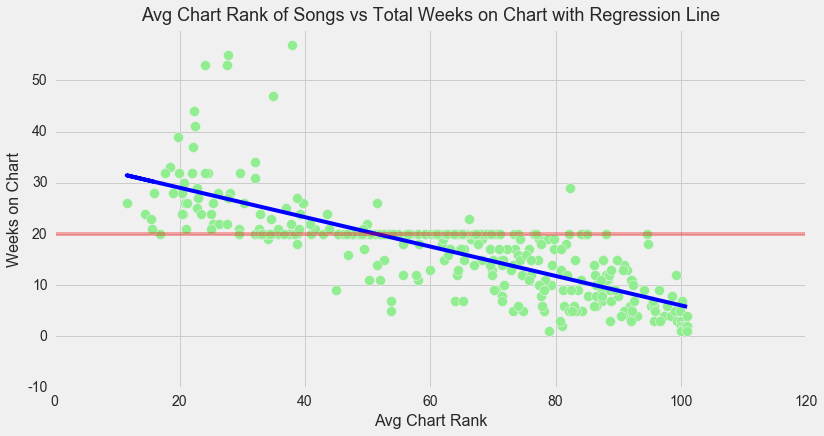

In [275]:
lm = linear_model.LinearRegression()

X = bb_df[['avg_rank']]
y = bb_df[['weeks_on_chart']]

lm.fit(X, y)
predictions = lm.predict(X)

fig, ax = plt.subplots(1,1, figsize = (12,6))

plt.scatter(x = bb_df['avg_rank'], y = bb_df['weeks_on_chart'],s = 100, c = 'lightgreen')
plt.plot(X, predictions, c= 'b')

ax.set_title('Avg Chart Rank of Songs vs Total Weeks on Chart with Regression Line', fontsize = 18, y = 1.01)
ax.set_xlabel('Avg Chart Rank', fontsize = 16)
ax.set_xticklabels([0,20,40,60,80,100,120],fontsize = 14)
ax.set_ylabel('Weeks on Chart', fontsize = 16)
ax.set_yticklabels([-10,0,10,20,30,40,50], fontsize = 14)

ax.axhline(y = 20, color = 'r', alpha = .33, animated = True)

plt.savefig('avg_rank_vs_total_time_reg.png')

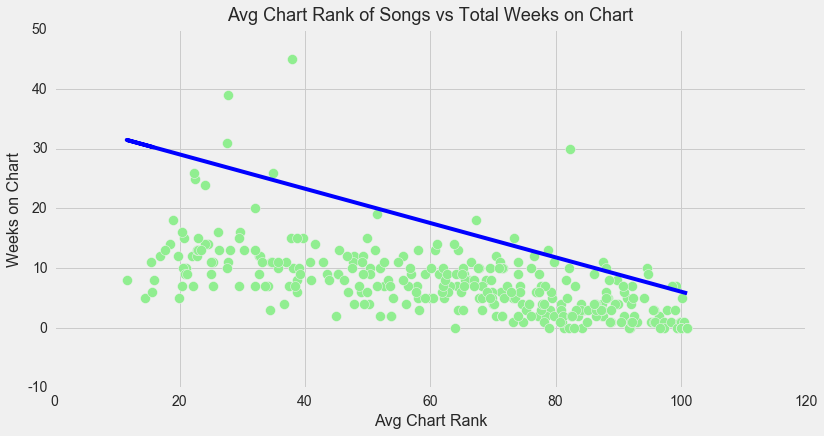

In [274]:
lm = linear_model.LinearRegression()

X = bb_df[['avg_rank']]
y = bb_df[['weeks_on_chart']]

lm.fit(X, y)
predictions = lm.predict(X)

fig, ax = plt.subplots(1,1, figsize = (12,6))

plt.scatter(x = bb_df['avg_rank'], y = bb_df['weeks_to_peak_rank'],s = 100, c = 'lightgreen')
plt.plot(X, predictions, c= 'b')

ax.set_title('Avg Chart Rank of Songs vs Total Weeks on Chart', fontsize = 18, y = 1.01)
ax.set_xlabel('Avg Chart Rank', fontsize = 16)
ax.set_xticklabels([0,20,40,60,80,100,120],fontsize = 14)
ax.set_ylabel('Weeks on Chart', fontsize = 16)
ax.set_yticklabels([-10,0,10,20,30,40,50], fontsize = 14)

plt.savefig('avg_rank_vs_time_reg.png')

## Part 8: Statistical Analysis

#### Hypothesis: Songs that entered the chart during the summer months (Jun, Jul, Aug) stayed in the chart longer.
* This hypothesis was informed by anecdotal evidence of monster summer hits:
  * 2016: This Is What You Came For by Calvin Harris featuring Rihanna
  * 2015: The Hills by The Weeknd 
  * 2014: Problem by Ariana Grande feat. Iggy Azalea
  * This is just to name a few, not saying these were the only songs dominating the air waves

In [226]:
#Hypothesis: Songs that rose to their peak position quickly stay in the chart longer.

In [282]:
def summer_songs(x):
    if x in [6, 7, 8]:
        season = 'Summer'
    else:
        season = 'Rest of Year'
    return season

bb_df['song_season'] = bb_df["month_entered"].apply(summer_songs)
bb_df.head(3)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,artist,track,genre,top_chart_rank,date_entered,date_peaked,weeks_on_chart,weeks_to_peak_rank,avg_rank,month_entered,season_entered,song_season
0,Destiny's Child,Independent Women Part I,Rock,1.0,2000-09-23,2000-11-18,28,8.0,15.857143,9,Rest of Year,Rest of Year
1,Santana,"Maria, Maria",Rock,1.0,2000-02-12,2000-04-08,26,8.0,11.538462,2,Rest of Year,Rest of Year
2,Savage Garden,I Knew I Loved You,Rock,1.0,1999-10-23,2000-01-29,33,14.0,18.393939,10,Rest of Year,Rest of Year


In [290]:
summer_songs = pd.Series((bb_df[bb_df['song_season'] == 'Summer']['weeks_on_chart']))
print summer_songs.head()

other_songs = pd.Series((bb_df[bb_df['song_season'] == 'Rest of Year']['weeks_on_chart']))
print other_songs.head()

3    24
4    21
5    24
8    26
9    55
Name: weeks_on_chart, dtype: int64
0    28
1    26
2    33
6    32
7    20
Name: weeks_on_chart, dtype: int64


In [297]:
print np.mean(summer_songs)
print np.mean(other_songs)
print np.mean(summer_songs) - np.mean(other_songs)

16.6486486486
16.7695473251
-0.120898676454


In [296]:
from scipy import stats as stats

stats.ttest_ind(summer_songs, other_songs)

Ttest_indResult(statistic=-0.10008354859370847, pvalue=0.92034166263698025)

#### Looking at the difference in means for amount of time spent on the chart, summer songs don't appear to be monster hits compared with songs released during other seasons.